### `Ali Almalki` 

#### **Color Spaces**

In this tutorial I am going to do the following:
* View the individual channels of an RGB Image
* Manipulate a color space
* Introduce HSV Color Spaces

In [1]:
# Import required libraries 
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Create a helper function to display an image 
def display_image(title="", image=None, size=10):
  """
  This function takes an image as an input and returns a displayed image.
  """

  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h 
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show() # display the image

In [3]:
# Download images 
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

--2022-06-27 12:17:29--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.106
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  21.2MB/s    in 1.3s    

2022-06-27 12:17:31 (21.2 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [4]:
# Unzip images 
!unzip -qq images.zip

In [5]:
# Load a sample image 
image = cv2.imread("/content/images/beatle.jpg")

In [6]:
# Use cv2.split function to get each color space (BGR) separately
B, G, R = cv2.split(image)

In [7]:
print(B)
print(B.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(159, 318)


In [8]:
print(B.shape)
print(G.shape)
print(R.shape)

(159, 318)
(159, 318)
(159, 318)


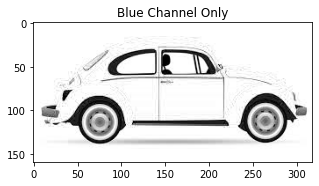

In [9]:
# Each color space on it's own will look like a grayscale as it lacks the other color channels
display_image("Blue Channel Only", B)

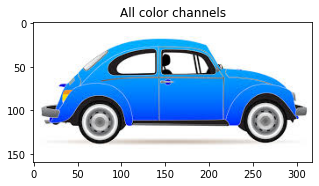

In [10]:
# Display the image with all color channels
display_image("All color channels", image)

In [11]:
# Let's create a matrix of zeros with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")


In [22]:
zeros, zeros.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), (159, 318))

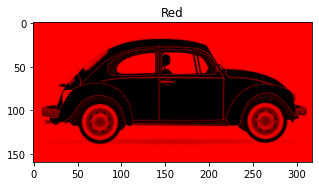

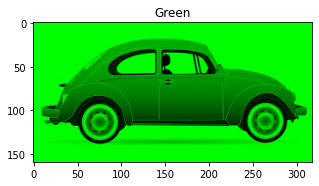

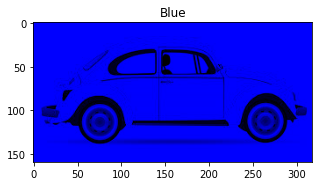

In [13]:
display_image("Red", cv2.merge([zeros, zeros, R]))
display_image("Green", cv2.merge([zeros, G, zeros]))
display_image("Blue", cv2.merge([B, zeros, zeros]))

In [14]:
# Load another image 
image_2 = cv2.imread("/content/images/Sunflowers.jpg")

In [16]:
B, G, R = cv2.split(image_2)
print(B)
print(B.shape)
print(G.shape)
print(R.shape)
# They all must have the same shape to be merged later (359, 580)

[[247 247 246 ... 255 254 253]
 [253 253 252 ... 250 250 251]
 [255 255 255 ... 249 249 249]
 ...
 [  1   4   0 ...   2   3   2]
 [  2   4   1 ...   0   0   0]
 [  3   5   0 ...   0   0   4]]
(359, 580)
(359, 580)
(359, 580)


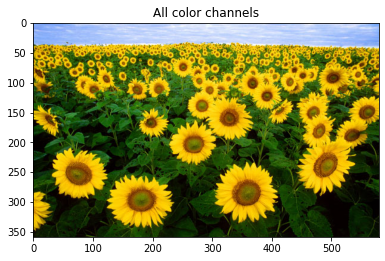

In [29]:
# Let's re-make the original image - merge all color components back again
all_colors = cv2.merge([B, G, R])


display_image("All color channels", all_colors)

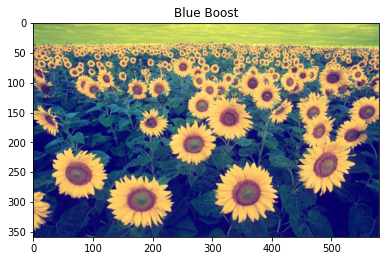

In [30]:
# Let's amplify the blue color
amplify_blue = cv2.merge([B+100, G, R])
display_image("Blue Boost", amplify_blue)

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

In [32]:
# Load another image
coffee_image = cv2.imread("/content/images/coffee.jpg")


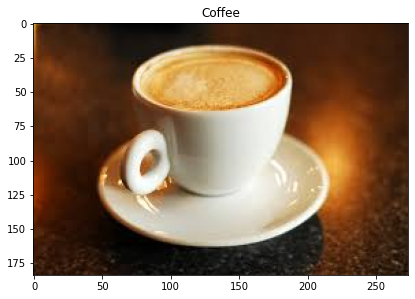

In [33]:
display_image("Coffee", coffee_image)

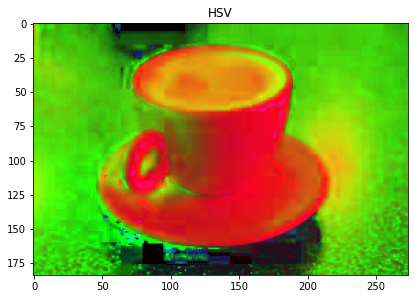

In [34]:
# Convert to HSV
hsv_image = cv2.cvtColor(coffee_image, cv2.COLOR_BGR2HSV)
display_image('HSV', hsv_image)

###### This looks odd....why? Because our plotting function was designed for RGB only images, not HSV

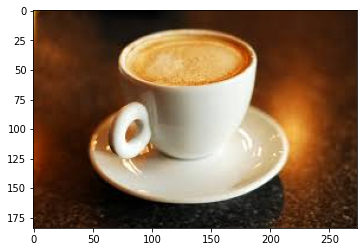

In [35]:
# Let's plot the same image but this time from HSV to RGB 
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

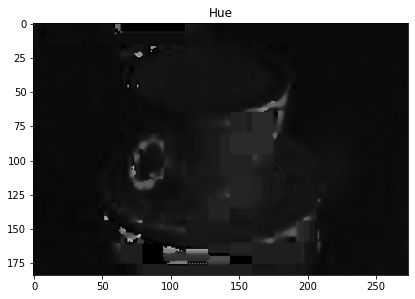

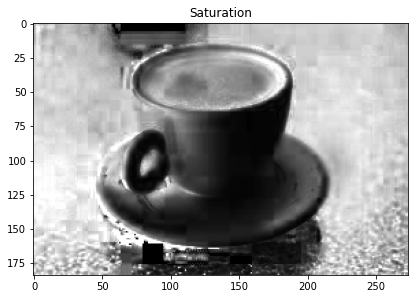

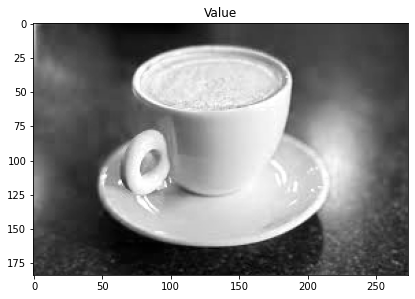

In [36]:
# Switching back to viewing the RGB representation
display_image("Hue", hsv_image[:, :, 0])
display_image("Saturation", hsv_image[:, :, 1])
display_image("Value", hsv_image[:, :, 2])

### References: 

* [OpenCV Documentation](https://docs.opencv.org/4.x/)
